In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import os
dataset_path = '/kaggle/input/cropdataset/PlantVillage'

In [2]:
# Verify directory structure
classes = os.listdir(dataset_path)
print("Classes found:", classes)

Classes found: ['bacterial_blight in Cotton', 'Corn___Northern_Leaf_Blight', 'RedRust sugarcane', 'Grape___healthy', 'Healthy Maize', 'Orange___Haunglongbing_(Citrus_greening)', 'Wheat___Yellow_Rust', 'Pepper__bell___Bacterial_spot', 'Tungro', 'Soybean___healthy', 'Wheat mite', 'Anthracnose on Cotton', 'Healthy Wheat', 'Squash___Powdery_mildew', 'Cotton Aphid', 'Common_Rust', 'Background_without_leaves', 'Potato___healthy', 'American Bollworm on Cotton', 'fresh cotton plant', 'Tomato_Leaf_Mold', 'Yellow Rust Sugarcane', 'Flag Smut', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Corn___healthy', 'fresh cotton leaf', 'Wheat scab', 'Strawberry___Leaf_scorch', 'Army worm', 'cotton whitefly', 'Peach___healthy', 'Wheat leaf blight', 'Healthy cotton', 'Wilt', 'Tomato_Bacterial_spot', 'bollrot on Cotton', 'Apple___Apple_scab', 'Rice Blast', 'Becterial Blight in Rice', 'Tomato_Septoria_leaf_spot', 'Tomato_healthy', 'diseased cotton plant', 'cotton mealy bug', 'maize ear rot', 'Tomato_Spider_mites_T

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Set up data normalization for the validation set
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create training and validation generators
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

validation_generator = validation_datagen.flow_from_directory(
    dataset_path,  # Assuming validation data is in the same directory; adjust if separate
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='categorical'
)

Found 104397 images belonging to 89 classes.
Found 104397 images belonging to 89 classes.


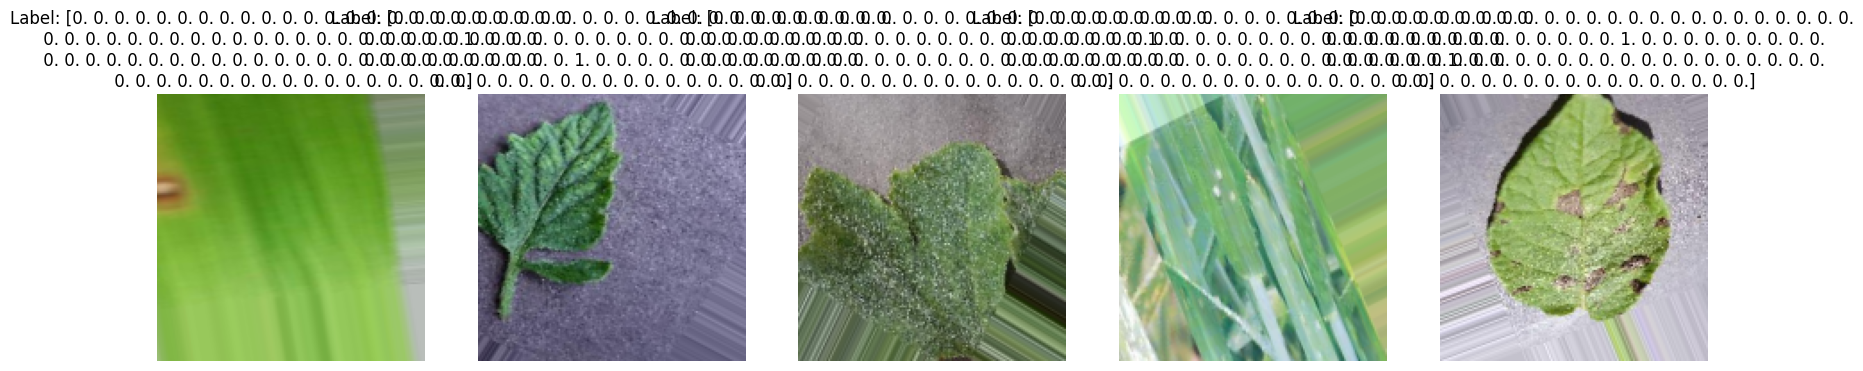

In [4]:
import matplotlib.pyplot as plt

# Display a batch of images
batch = next(train_generator)
images, labels = batch

fig, axes = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
    axes[i].imshow(images[i])
    axes[i].set_title(f"Label: {labels[i]}")
    axes[i].axis('off')

plt.show()

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Adjust output layer according to number of classes
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Use 'categorical_crossentropy' for multi-class classification
    metrics=['accuracy']
)

# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 89)             │        45,657 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,498,265 (13.34 MB)

 Trainable params: 3,498,265 (13.34 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1726416184.764155     102 service.cc:145] XLA service 0x7cacb400c3f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726416184.764211     102 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1726416184.764218     102 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


   1/3262 ━━━━━━━━━━━━━━━━━━━━ 9:06:52 10s/step - accuracy: 0.0000e+00 - loss: 4.4758

I0000 00:00:1726416190.286374     102 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1347/3262 ━━━━━━━━━━━━━━━━━━━━ 10:32 330ms/step - accuracy: 0.1744 - loss: 3.3557

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


3262/3262 ━━━━━━━━━━━━━━━━━━━━ 1381s 420ms/step - accuracy: 0.2839 - loss: 2.7804 - val_accuracy: 0.6202 - val_loss: 1.1740
Epoch 2/30
   1/3262 ━━━━━━━━━━━━━━━━━━━━ 1:35 29ms/step - accuracy: 0.7500 - loss: 0.9113

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3262/3262 ━━━━━━━━━━━━━━━━━━━━ 0s 105us/step - accuracy: 0.7500 - loss: 0.9113 - val_accuracy: 0.6154 - val_loss: 1.9362
Epoch 3/30
3262/3262 ━━━━━━━━━━━━━━━━━━━━ 1120s 343ms/step - accuracy: 0.6108 - loss: 1.2453 - val_accuracy: 0.7123 - val_loss: 0.8344
Epoch 4/30
3262/3262 ━━━━━━━━━━━━━━━━━━━━ 0s 11us/step - accuracy: 0.5938 - loss: 1.3373 - val_accuracy: 0.7692 - val_loss: 1.1749
Epoch 5/30
3262/3262 ━━━━━━━━━━━━━━━━━━━━ 1120s 343ms/step - accuracy: 0.6807 - loss: 0.9765 - val_accuracy: 0.7550 - val_loss: 0.6512
Epoch 6/30
3262/3262 ━━━━━━━━━━━━━━━━━━━━ 0s 8us/step - accuracy: 0.7188 - loss: 0.8778 - val_accuracy: 0.7692 - val_loss: 0.7207
Epoch 7/30
3262/3262 ━━━━━━━━━━━━━━━━━━━━ 1163s 356ms/step - accuracy: 0.7165 - loss: 0.8519 - val_accuracy: 0.7743 - val_loss: 0.6366
Epoch 8/30
3262/3262 ━━━━━━━━━━━━━━━━━━━━ 0s 9us/step - accuracy: 0.7812 - loss: 0.5140 - val_accuracy: 0.6923 - val_loss: 1.4338
Epoch 9/30
3262/3262 ━━━━━━━━━━━━━━━━━━━━ 1187s 363ms/step - accuracy: 0.7350 - los

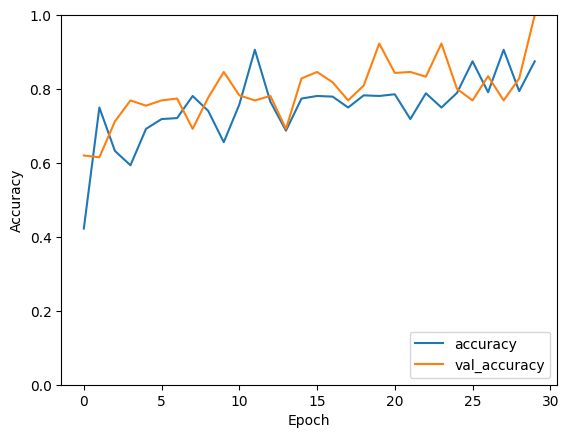

In [7]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,  # Adjust the number of epochs as needed
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [8]:
# Evaluate the model on the validation set
eval_results = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)

# Print evaluation results
print(f"Validation Loss: {eval_results[0]}")
print(f"Validation Accuracy: {eval_results[1]}")

3262/3262 ━━━━━━━━━━━━━━━━━━━━ 239s 73ms/step - accuracy: 0.8252 - loss: 0.4455
Validation Loss: 0.44634485244750977
Validation Accuracy: 0.8260365724563599


In [9]:
# Save the model to a file
model.save('/kaggle/working/20k_crop_disease_model.h5')

In [11]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np  # Make sure numpy is imported

# Load the saved model
loaded_model = load_model('/kaggle/working/20k_crop_disease_model.h5')

# Define a function to predict the class of a new image
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Adjust size as needed
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize
    predictions = loaded_model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    return predicted_class

# Example usage
img_path = '/kaggle/input/cropdataset/PlantVillage/Apple___Apple_scab/image (1).JPG'  # Replace with the path to your image
predicted_class = predict_image(img_path)
print(f"Predicted class index: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 673ms/step
Predicted class index: [2]


In [12]:
# Get class labels from the training generator
class_indices = train_generator.class_indices
class_labels = list(class_indices.keys())

In [21]:
# Define a function to predict the disease name
def predict_disease(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Adjust size as needed
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize
    predictions = loaded_model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_labels[predicted_class_index]
    return predicted_class_name

# Example usage
img_path = '/kaggle/input/cropdataset/PlantVillage/Apple___healthy/image (10).JPG'  # Replace with the path to your image
predicted_disease_name = predict_disease(img_path)
print(f"Predicted disease name: {predicted_disease_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted disease name: Apple___healthy
